In [1]:
%load_ext autoreload
#from coffea import util, processor
from msdprocessor import msdProcessor
from coffea.nanoevents import NanoEventsFactory, BaseSchema, PFNanoAODSchema
import json
import distributed
import dask
import awkward as ak
import hist
import matplotlib.pyplot as plt
import dask_awkward

/uscms/home/nyabando/nobackup/miniconda3/envs/fastjet/lib/python3.12/site-packages/coffea/nanoevents/methods/candidate.py:11: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


In [2]:
fileset = "/uscms/home/jennetd/nobackup/hbb-prod-modes/run3-triggers/data-mc/QCD_Pt470to600.root"

In [3]:
events = NanoEventsFactory.from_root(
    {fileset: "/Events"},
    #permit_dask=True,
    schemaclass=PFNanoAODSchema
).events()

In [4]:
dask_awkward.num(events, axis=0).compute()

92000

In [5]:
result = msdProcessor().process(events)

#--------------------------------------------------------------------------
#                         FastJet release 3.4.1
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


In [6]:
compute=dask.compute(result)[0]

In [7]:
h = compute['ExampleHistogram']

In [8]:
h1 = compute['ExampleHistogram1']

In [9]:
h2 = compute['ExampleHistogram2']

In [10]:
h3 = compute['ExampleHistogram3']

In [11]:
h4 = compute['ExampleHistogram4']

In [12]:
h5= compute['ExampleHistogram5']

In [13]:
print(h.axes)

(Regular(15, 450, 1200, name='pt', label='Jet $p_{T}$ [GeV]'), Regular(12, -6, 6, name='eta', label='Jet eta'), Regular(36, 0, 252, name='msoftdrop', label='Jet msoftdrop'), Regular(10, 0, 1, name='n2', label='Jet n2'))


In [14]:
# sum(h3[{'msoftdrop3':sum}].counts())

In [15]:
# sum(h3[{'msoftdrop3':sum}].counts(flow=True))

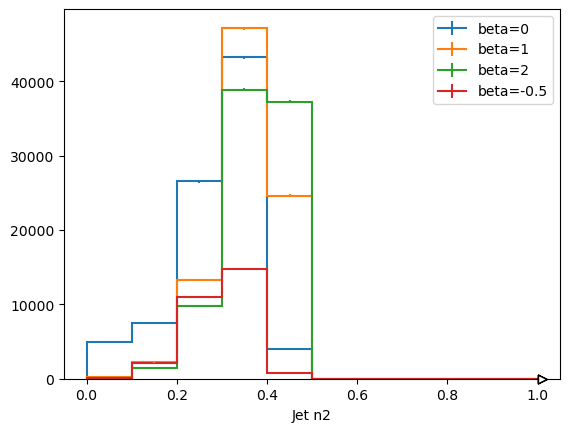

In [16]:
h[{'eta':sum, 'pt':sum, 'msoftdrop':sum}].plot1d(label="beta=0")
h1[{'msoftdrop1':sum}].plot1d(label="beta=1")
h2[{'msoftdrop2':sum}].plot1d(label="beta=2")
h3[{'msoftdrop3':sum}].plot1d(label="beta=-0.5")

plt.legend()
# h[{'eta':sum, 'pt':sum, 'msoftdrop':sum}].plot1d
# This sums over eta and pT and draws msoftdrop

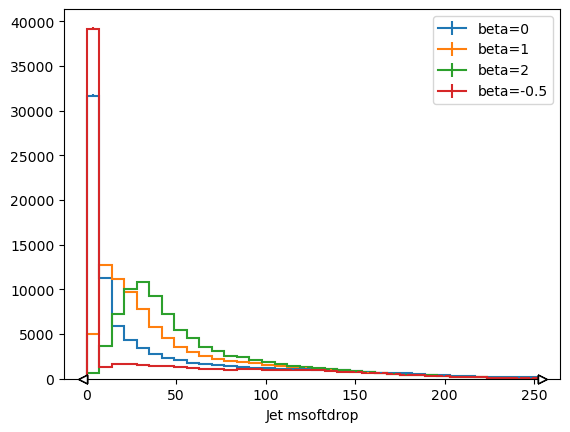

In [17]:
h[{'eta':sum, 'pt':sum, 'n2':sum}].plot1d(label="beta=0")
h1[{'n2b':sum}].plot1d(label="beta=1")
h2[{'n2b2':sum}].plot1d(label="beta=2")
h3[{'n2b3':sum}].plot1d(label="beta=-0.5")

plt.legend()
# h[{'eta':sum, 'pt':sum, 'msoftdrop':sum}].plot1d
# This sums over eta and pT and draws msoftdrop

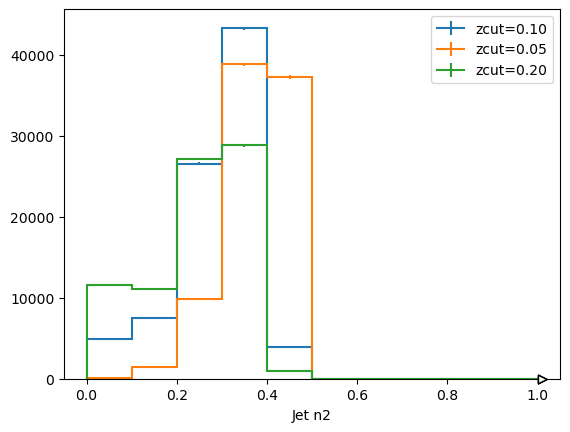

In [18]:
h[{'eta':sum, 'pt':sum, 'msoftdrop':sum}].plot1d(label="zcut=0.10")
h4[{'msoftdropz1':sum}].plot1d(label="zcut=0.05")
h5[{'msoftdropz2':sum}].plot1d(label="zcut=0.20")

plt.legend()

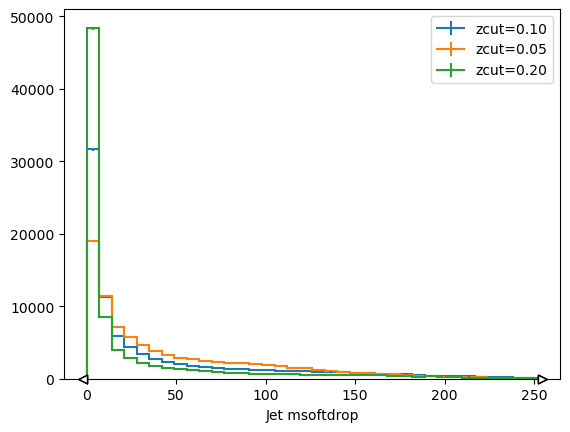

In [19]:
h[{'eta':sum, 'pt':sum, 'n2':sum}].plot1d(label="zcut=0.10")
h4[{'n2z1':sum}].plot1d(label="zcut=0.05")
h5[{'n2z2':sum}].plot1d(label="zcut=0.20")

plt.legend()

In [20]:
h1[{'n2b':sum, 'n2b2':sum, 'n2b3':sum}].plot1d()
# h1[{'n2b':sum, 'n2b3':sum, 'msoftdrop':sum, 'n2': sum}].plot1d()

ValueError: The axis name n2b2 could not be found

In [ ]:
h[{'eta':sum, 'pt':sum, 'msoftdrop':sum, 'n2b': sum, 'n2':sum, 'msoftdrop'}].plot1d()
h[{'eta':sum, 'pt':sum, 'msoftdrop':sum, 'n2': sum}].plot1d()

In [ ]:
h[{'msoftdrop':sum, 'eta':sum}].plot1d()
# This sums over eta and msoftdrop and draws pT

In [ ]:
result['pt'].plot1d(overlay='wc')
plt.yscale('log')
#plt.ylim(1e-4, 1000)

plt.legend(ncol=3,bbox_to_anchor=(1.0,1.1));

In [ ]:
elapsed = time.time() - tstart
print("Total time: %.1f seconds"%elapsed)

In [ ]:
#result = msdprocessor().process(events)

In [ ]:
events['q1pt'].plot1d(overlay='wc')
plt.yscale('log')
#plt.ylim(1e-4, 1000)

plt.legend(ncol=3,bbox_to_anchor=(1.0,1.1));

In [ ]:
output['q2pt'].plot1d(overlay='wc')
plt.yscale('log')
#plt.ylim(1e-4, 1000)

plt.legend(ncol=3,bbox_to_anchor=(1.0,1.1));

In [ ]:
output['hpt'].plot1d(overlay='wc')
plt.yscale('log')
#plt.ylim(1e-4, 1000)

plt.legend(ncol=3,bbox_to_anchor=(1.0,1.1));

In [ ]:
output['detaqq'].plot1d(overlay='wc')
plt.yscale('log')
#plt.ylim(1e-4, 1000)

plt.legend(ncol=3,bbox_to_anchor=(1.0,1.1));

In [ ]:
output['dphiqq'].plot1d(overlay='wc')
plt.yscale('log')
#plt.ylim(1e-4, 1000)

plt.legend(ncol=3,bbox_to_anchor=(1.0,1.1));

In [ ]:
output['mqq'].plot1d(overlay='wc')
plt.yscale('log')
#plt.ylim(1e-4, 1000)

plt.legend(ncol=3,bbox_to_anchor=(1.0,1.1));